In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
img1 = cv2.imread("/content/drive/MyDrive/Images/7/sl.jpg")
img2 = cv2.imread("/content/drive/MyDrive/Images/7/sm.jpg")
img3 = cv2.imread("/content/drive/MyDrive/Images/7/sr.jpg")
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

In [33]:
def panorama_creation(im1, im1_gray, im2_gray):
  # Find size of image1
  sz = im1.shape

  # Define the motion model
  warp_mode = cv2.MOTION_HOMOGRAPHY

  # Define 2x3 or 3x3 matrices and initialize the matrix to identity
  if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
  else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)

  # Specify the number of iterations and the threshold of the increment in the correlation coefficient between two iterations
  number_of_iterations = 5000;
  termination_eps = 1e-10

  # Define termination criteria
  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations, termination_eps)

  warpMode = cv2.MOTION_HOMOGRAPHY  

  # Run the ECC algorithm using OpenCV function findTransformECC() 
  cc, warpMatrix = cv2.findTransformECC (im1_gray, im2_gray,warp_matrix, warpMode, criteria)  

  im3 = cv2.warpPerspective (im1 , warpMatrix , (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_FILL_OUTLIERS)

  return im3

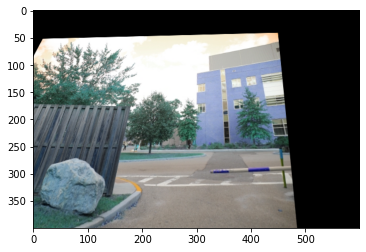

In [34]:
im12 = panorama_creation(img1, img1_gray, img2_gray)

plt.imshow(im12)
plt.show()

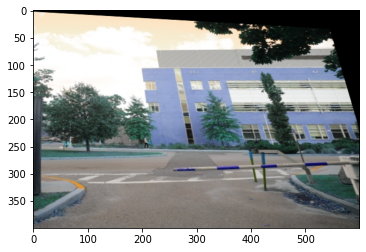

In [36]:
im23 = panorama_creation(img2, img2_gray, img3_gray)

plt.imshow(im23)
plt.show()

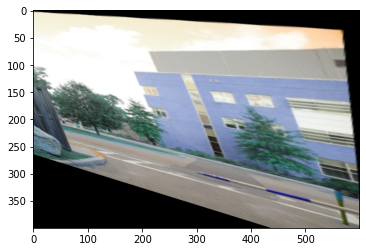

In [37]:
im_result = panorama_creation(im12, cv2.cvtColor(im12,cv2.COLOR_BGR2GRAY), cv2.cvtColor(im23,cv2.COLOR_BGR2GRAY))

plt.imshow(im_result)
plt.show()